Thinking probabilistically-- Discrete variables



Why do we do statistical inference?
To draw probabilistic conclusions about what we might expect if we collected the same data again.

To draw actionable conclusions from data.
To draw more general conclusions from relatively few data or observations.


Why do we use the language of probability?

Probability provides a measure of uncertainty.
Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.


Random number generators and hacker statistics

Bernoulli trial
An experiment that has two options,
"success" (True) and "failure" (False).

np.random.seed() # get the same random value all the time

In [33]:
import numpy as np

print(np.random.random(4)) 
print('\n') #new line blank
print(np.random.randint(3,9,(5,10)))
print('\n') #new line blank

print(np.random.randint(3,9,[5,10]))

[0.35706161 0.10806533 0.78755184 0.10658388]


[[5 7 4 7 8 5 4 7 6 6]
 [4 8 8 5 8 4 4 4 5 8]
 [3 8 7 7 6 6 5 3 8 5]
 [7 7 4 5 5 6 8 8 4 7]
 [6 6 8 7 4 3 5 3 6 5]]


[[6 8 4 6 5 6 3 3 7 3]
 [5 5 3 6 5 6 7 4 6 5]
 [7 4 5 6 4 8 8 5 4 7]
 [6 3 8 5 5 8 6 8 7 6]
 [7 8 4 5 5 7 6 3 5 8]]


In [17]:
for j in range(3):
    np.random.seed(1)
    for i in range(10):
        print(np.random.randint(0,100), end=' ')
    print()
    

37 12 72 9 75 5 79 64 16 1 
37 12 72 9 75 5 79 64 16 1 
37 12 72 9 75 5 79 64 16 1 


In [14]:
#Simulating 4 coin flipsIn 
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
print(random_numbers)
print(type(random_numbers))
heads = random_numbers < 0.5
print(heads)
print(type(heads))

np.sum(heads)

[0.37454012 0.95071431 0.73199394 0.59865848]
<class 'numpy.ndarray'>
[ True False False False]
<class 'numpy.ndarray'>


1

In [42]:
n_all_heads = 0 # Initialize number of 4-heads trials

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1  #new line under if have to tap in to be under command
n_all_heads / 10000

0.0623

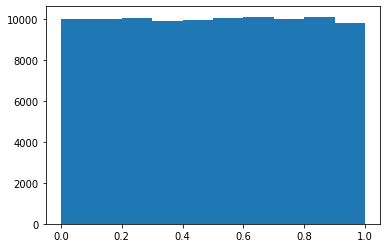

In [47]:
import matplotlib.pyplot as plt
import numpy as np
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


How many defaults might we expect?

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.


Seed the random number generator to 42.
Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.
Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - in this case the probability of a default, which is 0.05. On each iteration of the loop store the result in an entry of n_defaults.
Plot a histogram of n_defaults. Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.
Show your plot.

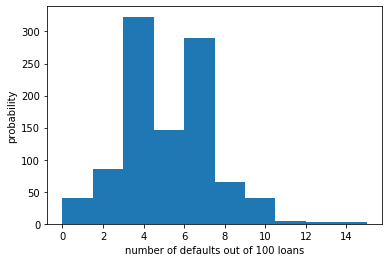

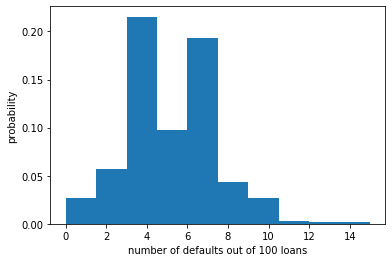

In [67]:
# The np.random module and Bernoulli trials


import numpy as np

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

# Seed random number generator
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density= False) #normal distribution
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

# Plot the histogram with default number of bins; label your axes   <============= correct Y-axis is propability
_ = plt.hist(n_defaults, density= True) #normal distribution
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
# Show the plot
plt.show()

In [ ]:
Will the bank fail?

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?


Compute the x and y values for the ECDF of n_defaults.
Plot the ECDF, making sure to label the axes. Remember to include marker = '.' and linestyle = 'none' in addition to x and y in your call plt.plot().
Show the plot.
Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, 
compute a boolean array that tells you whether a given entry of n_defaults is >= 10. 
Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.
The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10. 
Print this result



In [68]:
print( 'test')

test


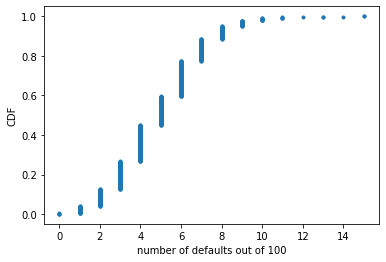

Probability of losing money = 0.022


In [70]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y


# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


In [ ]:
As we might expect, we most likely get 5/100 defaults. 
But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

Probability
distributions and stories: 

The Binomial distribution

Probability mass function (PMF)
 -The set of probabilities of discrete outcomes (discrate = ไม่ต่อเนื่อง)

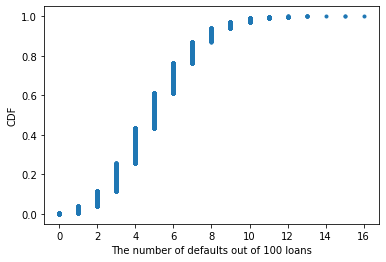

In [2]:
# Take 10,000 samples out of the binomial distribution: n_defaults
import numpy as np
import matplotlib.pyplot as plt


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

n_defaults = np.random.binomial(100, 0.05, size= 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('The number of defaults out of 100 loans')
_ = plt.ylabel('CDF')
# Show the plot
plt.show()



In [7]:
import numpy as np
print(np.arange(10))
            
    
    

[0 1 2 3 4 5 6 7 8 9]





The ECDF can be read in a similar way! For example, what percentage of countries have a summary index of less than 6? Look on the x-axis to 6, then move vertically until you hit the curve. You get to about 20%. Therefore, about 20% of the countries have a summary index of less than 6. So they have some economic freedom.




In [ ]:
Ploting Bionomial PMF


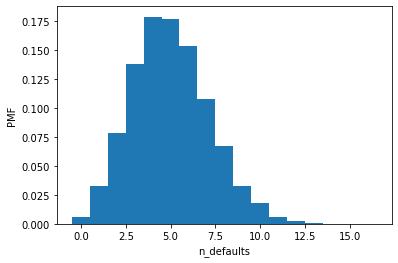

In [9]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults,density = True, bins=bins)

# Label axes
plt.xlabel('n_defaults')
plt.ylabel('PMF')
plt.xaxis()
# Show the plot
plt.show()


Relationship between Binomial and Poisson distributions

Poisson Distribution
● Limit of the Binomial distribution for low
probability of success and large number of trials.
● That is, for rare events

The Poisson CDF
In [1]: samples = np.random.poisson(6, size=10000)
In [2]: x, y = ecdf(samples)
In [3]: _ = plt.plot(x, y, marker='.', linestyle='none')
In [4]: plt.margins(0.02)
In [5]: _ = plt.xlabel('number of successes')
In [6]: _ = plt.ylabel('CDF')
In [7]: plt.show()

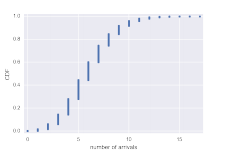

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size = 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9779 3.188857411362258
n = 20 Binom: 9.9805 2.2144344086018894
n = 100 Binom: 10.0054 3.0305396945098737
n = 1000 Binom: 10.0089 3.1264709801947626


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.


In [ ]:
Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Both Binomial and Poisson, though Poisson is easier to model and compute.

Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [ ]:
Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.
Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.
Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000).
Hit 'Submit Answer' to print the probability that you calculated.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.007


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

In [ ]:
#end of Thinking probabilistically Discrete variables